# Решающие деревья (decision trees)

Дерево решений — это метод представления решающих правил в иерархической структуре, состоящей из элементов двух типов — узлов (node) и листьев (leaf). В узлах находятся решающие правила и производится проверка соответствия примеров этому правилу по какому-либо атрибуту обучающего множества.

## Принцип работы и визуализация


In [ ]:
# классификация
from sklearn.tree import DecisionTreeClassifier 
from sklearn import datasets


iris = datasets.load_iris()
X = iris.data
y = iris.target

clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X, y)

In [ ]:
from sklearn import tree

text_representation = tree.export_text(clf)
print(text_representation)

In [ ]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)

In [ ]:
# регрессия

from sklearn.tree import DecisionTreeRegressor 
from sklearn import datasets


diab = datasets.load_diabetes()
X = diab.data
y = diab.target

reg = DecisionTreeRegressor(max_depth=3)
reg.fit(X, y)

In [ ]:
text_representation = tree.export_text(reg)
print(text_representation)

In [ ]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(reg, feature_names=diab.feature_names, filled=True)

## Алгоритмы построения

**ID3** (Итеративный дихотомайзер 3) был разработан в 1986 году Россом Куинланом. 
Алгоритм создает дерево, находя для каждого узла (т. е. жадным способом) категориальный признак, который даст наибольший прирост информации. Деревья вырастают до максимального размера, а затем обычно применяется этап отсечения, чтобы улучшить способность дерева обобщать новые данные.

**C4.5** является преемником ID3 и убрал ограничение, согласно которому объекты должны быть категориальными, путем динамического определения дискретного атрибута (на основе числовых переменных), который разбивает непрерывное значение атрибута на дискретный набор интервалов. C4.5 преобразует обученные деревья (т. е. выходные данные алгоритма ID3) в наборы правил «если-то». Затем оценивается точность каждого правила, чтобы определить порядок их применения. Отсечение выполняется путем удаления предусловия правила, если точность правила улучшается без него.

**CART** (деревья классификации и регрессии) очень похож на C4.5, но отличается тем, что поддерживает числовые целевые переменные (регрессия) и не вычисляет наборы правил. CART строит бинарные деревья, используя признак и порог, которые дают наибольший прирост информации в каждом узле.

https://scikit-learn.org/stable/modules/tree.html#tree-algorithms-id3-c4-5-c5-0-and-cart

https://academy.yandex.ru/handbook/ml/article/reshayushchiye-derevya

Алгоритм CART
Строит бинарное дерево, где в узлах находится предикат, в листах находится ответ.
Задача -- минимизировать ошибку на каждом листе.

Алгоритм обучения упрощённо можно описать следующим образом:
0. Проверяем критерий остановки
1. Строим всевозможные разбиения на две подвыборки по одному признаку
2. Выбираем лучшее разбиение
3. Возвращаемся к шагу 0 для потомков
4. Проводим отсечение (pruning)

Описание алогритма: https://scikit-learn.org/stable/modules/tree.html#mathematical-formulation

# Ансамбли
(метаалгоритмы, композиции алгоритмов)

- Бэггинг
 - Метод случайного леса (англ. random forest)
- Бустинг
 - Бустинг над решающими деревьями
- стекинг

https://towardsdatascience.com/ensemble-methods-bagging-boosting-and-stacking-c9214a10a205

## Бэггинг

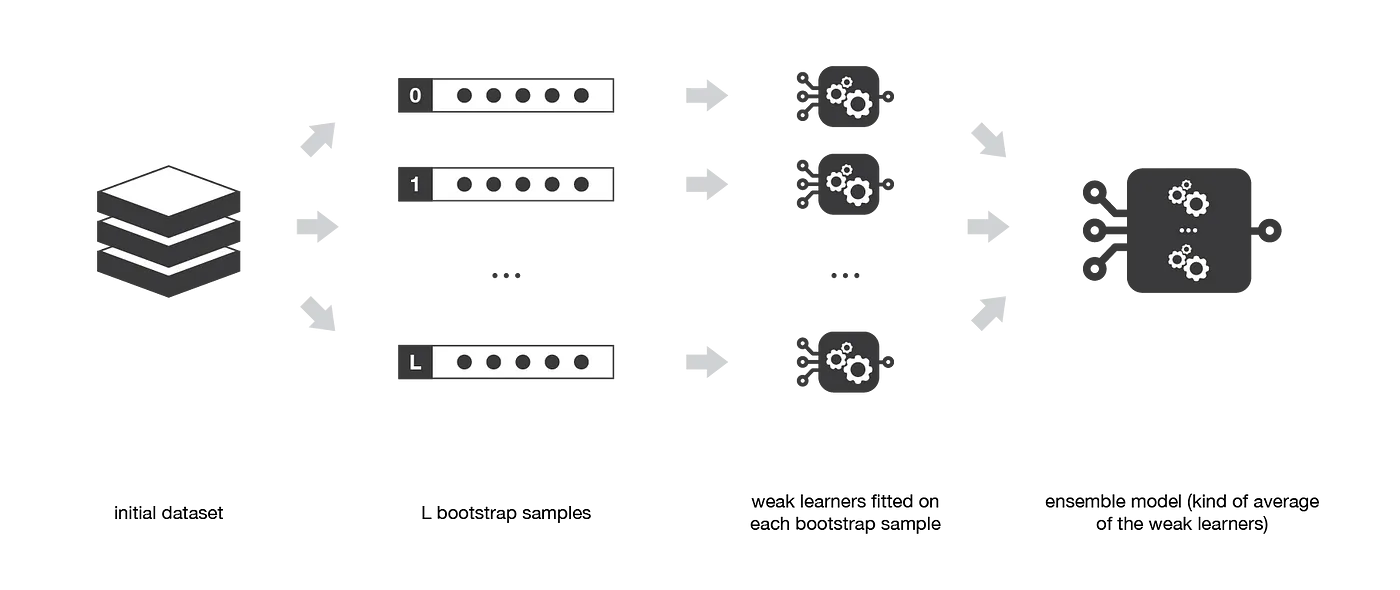

## Бустинг

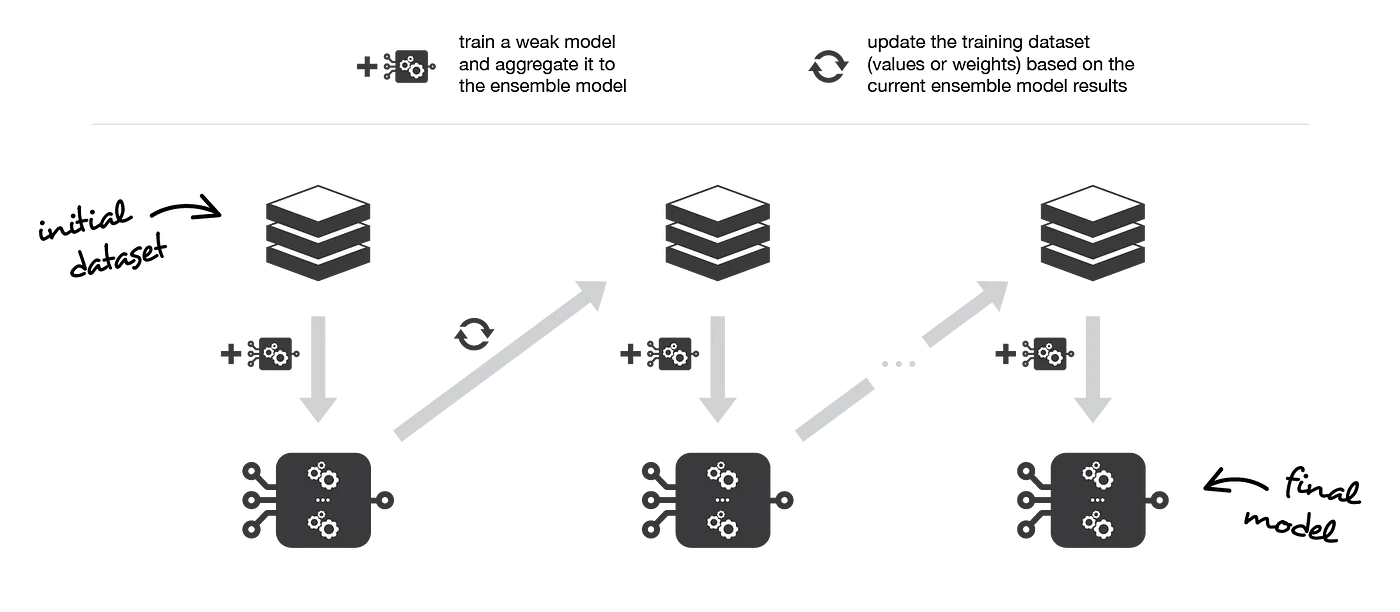

## Стекинг

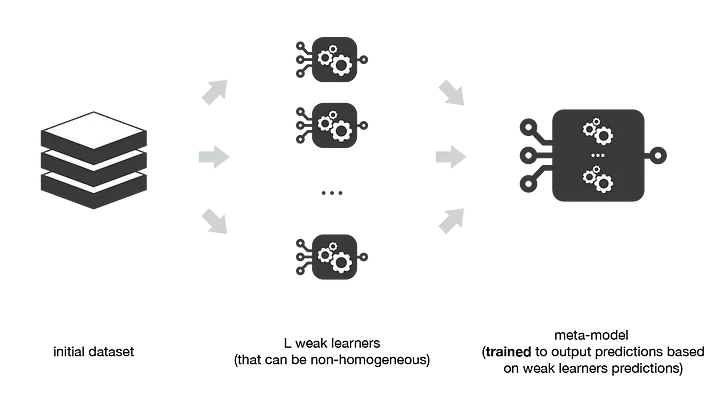

# Задание
  1. Использовать DecisionTreeClassifier и DecisionTreeRegressor для наборов данных своего варианта.
  2. Использовать [ансамбли](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble) для наборов данных своего варианта:
    - BaggingClassifier
    - BaggingRegressor
    - GradientBoostingClassifier
    - GradientBoostingRegressor
    - StackingClassifier
    - StackingRegressor
  3. Попробовать для решения задачи регрессии и классификации одну из библиотек (на выбор): 
    - [Catboost](https://catboost.ai/en/docs/concepts/python-usages-examples), 
    - [XGBoost](https://xgboost.readthedocs.io/en/stable/get_started.html), 
    - [LightGBM](https://github.com/microsoft/LightGBM/blob/master/examples/python-guide/simple_example.py)
  4. Реализовать обучения и вычисления дерева с использованием алгоритма CART для задачи регрессии и классификации.
  5. Доп. задание: реализовать(на выбор) бустинг или бэггинг.

Не забывайте про подготовку датасетов и подбор гиперпараметров.

Доп. ссылки:

* https://www.youtube.com/watch?v=kqJ03kWuvO0
* https://academy.yandex.ru/handbook/ml/article/reshayushchiye-derevya
* https://academy.yandex.ru/handbook/ml/article/ansambli-v-mashinnom-obuchenii
* https://academy.yandex.ru/handbook/ml/article/gradientnyj-busting
* https://medium.com/@abedinia.aydin/survey-of-the-decision-trees-algorithms-cart-c4-5-id3-97df842831cd
* https://towardsdatascience.com/ensemble-methods-bagging-boosting-and-stacking-c9214a10a205
* https://basegroup.ru/community/articles/math-cart-part1#comments

### для ргр

In [ ]:
data_class = pd.read_csv('../data/pred_card_transdata.csv')
data_class.drop(['Unnamed: 0'], axis=1, inplace=True)
data_class

In [ ]:
X_class = data_class.drop(['fraud'], axis=1)

In [ ]:
y_class = data_class['fraud']

In [ ]:
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, shuffle=False)

In [ ]:
params = {'max_depth' : [3, 4, 6, 8, 10],
         'min_samples_split' : np.arange(1, 5),
         'criterion' : ['entropy']}

In [ ]:
grid_class = GridSearchCV(DecisionTreeClassifier(), params, cv=3)
grid_class.fit(X_train_class, y_train_class)
grid_class.best_params_

In [ ]:
tree_class = DecisionTreeClassifier(criterion = 'entropy', max_depth = 8 , min_samples_split = 1)
tree_class.fit(X_train_class, y_train_class)

In [ ]:
data = [3, 4, 5, 1, 0, 1, 1]
d = np.array(data).reshape((1, -1))

In [ ]:
y_pred_class = tree_class.predict(d)

In [ ]:
confusion_matrix(y_test_class, y_pred_class)

In [ ]:
print(classification_report(y_test_class, y_pred_class))

In [ ]:
with open('../models/ModelDecisionTreeClassifier.pkl', "wb") as file:
    pickle.dump(tree_class, file)

In [ ]:
params = {
          'max_samples': [0.5, 1.0],
          'max_features': [0.5, 1.0]}

In [ ]:
grid_search = GridSearchCV(BaggingClassifier(DecisionTreeClassifier(criterion = 'entropy', max_depth = 8 , min_samples_split = 1)), params, cv=3)
grid_search.fit(X_train_class, y_train_class)
grid_search.best_params_

In [ ]:
bagging = BaggingClassifier(DecisionTreeClassifier(criterion = 'entropy', max_depth = 8 , min_samples_split = 1),
                            max_samples=1.0, max_features=1.0)
bagging.fit(X_train_class, y_train_class)

In [ ]:
with open('../models/ModelBaggingClassifier.pkl', "wb") as file:
    pickle.dump(bagging, file)

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data_class = pd.read_csv('../data/pre_card_transdata.csv')
data_class.drop(['Unnamed: 0'], axis=1, inplace=True)
data_class

In [ ]:
data_class.describe()

In [ ]:
X_class = data_class.drop(['fraud'], axis=1)

In [ ]:
y_class = data_class['fraud']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, shuffle=False)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train_class = scaler.fit_transform(X_train_class)
X_test_class = scaler.transform(X_test_class)

In [ ]:
pd.DataFrame(X_train_class, columns=X_class.columns)

In [ ]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
params = {'max_depth' : [3, 4, 6, 8, 10],
         'min_samples_split' : np.arange(1, 50),
         'criterion' : ['entropy']}

In [ ]:
grid_class = GridSearchCV(DecisionTreeClassifier(), params, cv=3)
grid_class.fit(X_train_class, y_train_class)
grid_class.best_params_

In [ ]:
tree_class = DecisionTreeClassifier(criterion = 'entropy', max_depth = 8 , min_samples_split = 1)
tree_class.fit(X_train_class, y_train_class)

In [ ]:
y_pred_class = tree_class.predict(X_test_class)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
confusion_matrix(y_test_class, y_pred_class)

In [ ]:
print(classification_report(y_test_class, y_pred_class))

In [ ]:
import pickle

In [ ]:
with open('../models/DecisionTreeClassifier.pkl', "wb") as file:
    pickle.dump(tree_class, file)

In [ ]:
with open('../models/DecisionTreeClassifier.pkl', "rb") as file:
    pkl_model = pickle.load(file)

In [ ]:
from sklearn import tree

text_class = tree.export_text(tree_class)
print(text_class)

In [ ]:
from matplotlib import pyplot as plt

fig_class = plt.figure(figsize=(50,50))
fig_class_img = tree.plot_tree(tree_class, feature_names=data_class.columns, filled=True)

In [ ]:
data_regress = pd.read_csv('../data/pre_kc_house_data.csv')
data_regress.drop(['Unnamed: 0'], axis=1, inplace=True)
data_regress

In [ ]:
X_regress = data_regress.drop(['price'], axis=1)

In [ ]:
y_regress = data_regress['price']

In [ ]:
X_train_regress, X_test_regress,  y_train_regress, y_test_regress = train_test_split(X_regress, y_regress, test_size=0.2, shuffle=False)

In [ ]:
scaler = StandardScaler()
X_train_regress = scaler.fit_transform(X_train_regress)
X_test_regress = scaler.transform(X_test_regress)

In [ ]:
pd.DataFrame(X_train_regress, columns=X_regress.columns)

In [ ]:
params = {'max_depth' : [3, 4, 6, 8, 10],
          'min_samples_split' : np.arange(1, 50),
          'criterion' : ['squared_error']}

In [ ]:
grid_class = GridSearchCV(DecisionTreeRegressor(), params, cv=3)
grid_class.fit(X_train_regress, y_train_regress)
grid_class.best_params_

In [ ]:
tree_regress = DecisionTreeRegressor(criterion = 'squared_error', max_depth = 10, min_samples_split = 42)
tree_regress.fit(X_train_regress, y_train_regress)

In [ ]:
y_pred_regress = tree_regress.predict(X_test_regress)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test_regress, y_pred_regress)

In [ ]:
text_regress = tree.export_text(tree_regress)
print(text_regress)

In [ ]:
fig = plt.figure(figsize=(30,30))
_ = tree.plot_tree(tree_regress, feature_names=data_regress.columns, filled=True)

# BaggingClassifier

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
params = {
          'max_samples': [0.5, 1.0],
          'max_features': [0.5, 1.0]}

In [ ]:
grid_search = GridSearchCV(BaggingClassifier(DecisionTreeClassifier(criterion = 'entropy', max_depth = 8 , min_samples_split = 1)), params, cv=3)
grid_search.fit(X_train_class, y_train_class)
grid_search.best_params_

In [ ]:
bagging = BaggingClassifier(DecisionTreeClassifier(criterion = 'entropy', max_depth = 8 , min_samples_split = 1), max_samples=1.0, max_features=1.0)
bagging.fit(X_train_class, y_train_class)

In [ ]:
y_pred_bagging_class = bagging.predict(X_test_class)

In [ ]:
with open('../models/BaggingClassifier.pkl', "wb") as file:
    pickle.dump(bagging, file)

In [ ]:
print(classification_report(y_test_class, y_pred_bagging_class))

In [ ]:
confusion_matrix(y_test_class, y_pred_bagging_class)

# BaggingRegressor

In [ ]:
from sklearn.ensemble import BaggingRegressor

In [ ]:
params = {
          'max_samples': [0.5, 1.0],
          'max_features': [0.5, 1.0]}

In [ ]:
grid_search = GridSearchCV(BaggingRegressor(DecisionTreeRegressor(criterion = 'squared_error', max_depth = 10, min_samples_split = 42)), params , cv=3)
grid_search.fit(X_train_regress, y_train_regress)
grid_search.best_params_

In [ ]:
bagging = BaggingRegressor(DecisionTreeRegressor(criterion = 'squared_error', max_depth = 10, min_samples_split = 42), max_features = 1.0, max_samples = 0.5)
bagging.fit(X_train_regress, y_train_regress)

In [ ]:
y_pred_bagging_regress = bagging.predict(X_test_regress)

In [ ]:
r2_score(y_test_regress, y_pred_bagging_regress)

# GradientBoostingClassifier 

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gradient = GradientBoostingClassifier()
gradient.fit(X_train_class, y_train_class)

In [ ]:
y_pred_gradient_class = gradient.predict(X_test_class)

In [ ]:
print(classification_report(y_test_class, y_pred_gradient_class))

In [ ]:
confusion_matrix(y_test_class, y_pred_gradient_class)

In [ ]:
r2_score(y_test_class, y_pred_gradient_class)

# GradientBoostingRegressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gradient = GradientBoostingRegressor()
gradient.fit(X_train_regress, y_train_regress)

In [ ]:
y_pred_gradient_regress = gradient.predict(X_test_regress)

In [ ]:
r2_score(y_test_regress, y_pred_gradient_regress)

# StackingClassifier

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
estimators = [('df', DecisionTreeClassifier(criterion = 'entropy', max_depth = 8 , min_samples_leaf = 5)),
              ('lr', LogisticRegression(penalty='l2'))]

In [ ]:
stacking = StackingClassifier(estimators= estimators , final_estimator = DecisionTreeClassifier())

In [ ]:
params = {'lr_C' : [0,1, 1, 5, 10]}

In [ ]:
grid = GridSearchCV(stacking, params, cv=3)
grid.fit(X_train_class, y_train_class).best_params_

In [ ]:
estimators = [('df', DecisionTreeClassifier(criterion = 'entropy', max_depth = 8 , min_samples_leaf = 5)),
              ('lr', LogisticRegression(penalty='l2', C = 5))]

In [ ]:
st = StackingClassifier(estimators=estimators , final_estimator = DecisionTreeClassifier()).fit(X_train_class, y_train_class)

In [ ]:
y_pred_stacking_class = st.predict(X_test_class)

In [ ]:
print(classification_report(y_test_class, y_pred_stacking_class))

In [ ]:
confusion_matrix(y_test_class, y_pred_stacking_class)

# StackingRegressor

In [ ]:
from sklearn.ensemble import StackingRegressor

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [ ]:
estimators = [('lr', LinearRegression()),
             ('lasso', Lasso()),
             ('ridge', Ridge())] 

In [ ]:
stacking = StackingRegressor(estimators= regressors)

In [ ]:
st = StackingRegressor(estimators=estimators , final_estimator = LinearRegression()).fit(X_train_regress, y_train_regress)

In [ ]:
y_pred_stacking_regress = st.predict(X_test_regress)

In [ ]:
r2_score(y_test_regress, y_pred_stacking_regress)

# Библиотека CatBoost

## CatBoostClassifier

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
params = {
            'iterations': np.arange(100, 1000, 200),
            'learning_rate':[0.01, 0.1],
            'depth' : [3, 4, 6, 8, 10],
            'min_data_in_leaf' : np.arange(1, 6)
}

In [ ]:
booster = CatBoostClassifier()
booster.grid_search(params, X_train_class, y_train_class, cv=3)['params']

In [ ]:
cat_boost_class = CatBoostClassifier(iterations=900, learning_rate = 0.01, depth = 10).fit(X_train_class, y_train_class)
y_pred_boost_class = cat_boost_class.predict(X_test_class)

In [ ]:
print(classification_report(y_test_class, y_pred_boost_class))

In [ ]:
confusion_matrix(y_test_class, y_pred_boost_class)

## CatBoostRegressor

In [ ]:
from catboost import CatBoostRegressor

In [ ]:
params = {
            'iterations': np.arange(100, 1000, 200),
            'learning_rate':[0.01, 0.1],
            'depth' : [3, 4, 6, 8, 10],
            'min_data_in_leaf' : np.arange(1, 6)
}

In [ ]:
booster = CatBoostRegressor()
booster.grid_search(params, X_train_regress, y_train_regress, cv=3)['params']

In [ ]:
cat_boost_regress = CatBoostRegressor(iterations= 900, learning_rate = 0.1, depth = 6).fit(X_train_regress, y_train_regress)
y_pred_boost_regress = cat_boost_regress.predict(X_test_regress)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test_regress, y_pred_boost_regress)

# Реализация DecisionTreeClassifier

In [ ]:
import numpy as np
from collections import Counter

class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None,*,value=None):
        self.feature = feature            #признак
        self.threshold = threshold        #порог
        self.left = left                  #левое дерево
        self.right = right                #правое дерево
        self.value = value                #значение
        
    def is_leaf_node(self):               #узел конечный
        return self.value is not None


class DecisionTreeClass:
    def __init__(self, min_samples_split=2, max_depth=100, n_features=None):
        self.min_samples_split=min_samples_split
        self.max_depth=max_depth
        self.n_features=n_features
        self.root=None

    def fit(self, X, y):
        self.n_features = X.shape[1] if not self.n_features else min(X.shape[1],self.n_features)
        self.root = self._grow_tree(X, y)
    
    # возврат узла дерева
    def _grow_tree(self, X, y, depth=0):
        n_samples, n_feats = X.shape
        n_labels = len(np.unique(y))       

        # проверка критерия остановки        
        if (depth>=self.max_depth or n_labels==1 or n_samples<self.min_samples_split):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_feats, self.n_features, replace=False)  # выборка признаков

        best_feature, best_thresh = self._best_split(X, y, feat_idxs)  # поиск лучшего рабиения

        # создание дочерних узлов
        left_idxs, right_idxs = self._split(X[:, best_feature], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y.iloc[left_idxs], depth+1)
        right = self._grow_tree(X[right_idxs, :], y.iloc[right_idxs], depth+1)
        return Node(best_feature, best_thresh, left, right)


    def _best_split(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_threshold = None, None

        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)

            for thr in thresholds:
                
                # расчет критерия информативности
                gain = self._information_gain(y, X_column, thr)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_threshold = thr

        return split_idx, split_threshold


    def _information_gain(self, y, X_column, threshold):
        
        # расчет энтропии родителя
        parent_entropy = self._entropy(y)

        # создание детей
        left_idxs, right_idxs = self._split(X_column, threshold)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0
        
        # расчет энтропии детей
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = self._entropy(y.iloc[left_idxs]), self._entropy(y.iloc[right_idxs])
        child_entropy = (n_l/n) * e_l + (n_r/n) * e_r

        # расчет прироста информации
        information_gain = parent_entropy - child_entropy
        return information_gain

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _entropy(self, y):
        hist = np.bincount(y)
        ps = hist / len(y)
        return -np.sum([p * np.log(p) for p in ps if p>0])


    # возврат самого распространенного значения
    def _most_common_label(self, y):
        counter = Counter(y)
        value = counter.most_common(1)[0][0]
        return value

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    # обход дерева
    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)
        

In [ ]:
data_replace = data_class.sample(frac=0.1).reset_index()

In [ ]:
X_class_replace = data_replace.drop(['fraud'], axis=1)
y_replace =  data_replace['fraud']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_class_replace, y_replace, test_size=0.2, shuffle=False)

In [ ]:
scaler = StandardScaler()
X_train_class = scaler.fit_transform(X_train)
X_test_class = scaler.transform(X_test)

In [ ]:
params = {'max_depth' : [3, 4, 6, 8, 10],
         'min_samples_split' : np.arange(1, 50),
         'criterion' : ['entropy']}

In [ ]:
grid_class = GridSearchCV(DecisionTreeClassifier(), params, cv=3)
grid_class.fit(X_train_class, y_train)
grid_class.best_params_

In [ ]:
tree_class = DecisionTreeClassifier(criterion = 'entropy', max_depth = 8 , min_samples_split = 5)
tree_class.fit(X_train_class, y_train)

In [ ]:
y_pred_class = tree_class.predict(X_test_class)

In [ ]:
r2_score(y_test, y_pred_class)

In [ ]:
cl = DecisionTreeClass(min_samples_split=5, max_depth=8)
cl.fit(X_train_class, y_train)

In [ ]:
y_pred_class = cl.predict(X_test_class)

In [ ]:
r2_score(y_test, y_pred_class)

# Реализация DecisionTreeRegressor

In [ ]:
import numpy as np
from collections import Counter

class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None,*,value=None):
        self.feature = feature            #признак
        self.threshold = threshold        #порог
        self.left = left                  #левое дерево
        self.right = right                #правое дерево
        self.value = value                #значение
        
    def is_leaf_node(self):               #узел конечный
        return self.value is not None


class DecisionTreeRegress:
    def __init__(self, min_samples_split=2, max_depth=100, n_features=None):
        self.min_samples_split=min_samples_split
        self.max_depth=max_depth
        self.n_features=n_features   #количество признаков
        self.root=None

    def fit(self, X, y):
        self.n_features = X.shape[1] if not self.n_features else min(X.shape[1],self.n_features)
        self.root = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):    #возврат узла дерева
        n_samples, n_feats = X.shape

        # проверка критерия остановки
        
        if (depth>=self.max_depth or n_samples<self.min_samples_split):
            leaf_value = np.mean(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_feats, self.n_features, replace=False)  # выборка признаков

        # поиск лучшего рабиения
        best_feature, best_thresh = self._best_split(X, y, feat_idxs)

        # создание дочерних узлов
        left_idxs, right_idxs = self._split(X[:, best_feature], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y.iloc[left_idxs], depth+1)
        right = self._grow_tree(X[right_idxs, :], y.iloc[right_idxs], depth+1)
        return Node(best_feature, best_thresh, left, right)


    def _best_split(self, X, y, feat_idxs):
        best_gain = -float("inf")
        split_idx, split_threshold = None, None

        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)

            for thr in thresholds:
                # расчет прироста информации
                gain = self._information_gain(y, X_column, thr)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_threshold = thr

        return split_idx, split_threshold


    def _information_gain(self, y, X_column, threshold):
        # расчет ошибки родителя
        parent_error = self._find_error(y)

        # создание детей
        left_idxs, right_idxs = self._split(X_column, threshold)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0
        # расчет  детей
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = self._find_error(y.iloc[left_idxs]), self._find_error(y.iloc[right_idxs])
        child_error = (n_l/n) * e_l + (n_r/n) * e_r

        # расчет прироста информации
        information_gain = parent_error - child_error
        return information_gain

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    # возврат значения
    def _find_error(self, y):
        
        mean = np.mean(y)
        value = np.sum((y - mean)**2)/y.shape
        return value

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    # обход дерева
    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)
        

In [ ]:
data_replace = data_regress.sample(frac=0.1).reset_index()

In [ ]:
data_replace = data_replace.drop(columns='index')

In [ ]:
X_regress_replace = data_replace.drop(['price'], axis=1)
y_replace =  data_replace['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_regress_replace, y_replace, test_size=0.2, shuffle=False)

In [ ]:
scaler = StandardScaler()
X_train_regress = scaler.fit_transform(X_train)
X_test_regress = scaler.transform(X_test)

In [ ]:
params = {'max_depth' : [3, 4, 6, 8, 10],
          'min_samples_split' : np.arange(1, 50),
          'criterion' : ['squared_error']}

In [ ]:
grid_regress = GridSearchCV(DecisionTreeRegressor(), params, cv=3)
grid_regress.fit(X_train_regress, y_train)
grid_regress.best_params_

In [ ]:
tree_regress = DecisionTreeRegressor(criterion = 'squared_error', max_depth = 10 , min_samples_split = 34)
tree_regress.fit(X_train_regress, y_train)

In [ ]:
y_pred_regress = tree_regress.predict(X_test_regress)

In [ ]:
r2_score(y_test, y_pred_regress)

In [ ]:
dr = DecisionTreeRegress(min_samples_split = 34, max_depth = 10)
dr.fit(X_train_regress, y_train)

In [ ]:
y_pred_regress = dr.predict(X_test_regress)

In [ ]:
r2_score(y_test, y_pred_regress)